In [28]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
% matplotlib inline # only if using notebooks

UsageError: Line magic function `%` not found.


# finding key words

In [166]:
stop_words = stopwords.words('english') 


df = pd.read_csv("../pushshift/comment/rjokes_comment_20200101_20201231.csv")
# df=df[df['score']>20].sort_values('score', ascending=False)

top_N = 100
txt = df.body.str.lower().str.replace(r'[^\w\s]', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)

words = [w for w in words if not w in stop_words]

bigrm = list(nltk.trigrams(words))
word_dist = nltk.FreqDist([' '.join(x) for x in bigrm])
rslt = pd.DataFrame(word_dist.most_common(top_N),
                columns=['Word', 'Frequency'])

/Users/johnchen/opt/anaconda3/envs/SP/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [167]:
rslt

,Word,Frequency
0,gt pop lt,1100
1,pop lt gt,1090
2,lt gt pop,1090
3,pop pop pop,612
4,reddit com r,559
...,...,...
95,web2x amp context,20
96,google com search,20
97,30 years ago,20
98,imgur com gallery,20


In [168]:
for i in range(len(rslt)):
    print(rslt.loc[[i]].Word.values)

['gt pop lt']
['pop lt gt']
['lt gt pop']
['pop pop pop']
['reddit com r']
['www reddit com']
['https www reddit']
['happy cake day']
['com r jokes']
['r jokes comments']
['youtube com watch']
['com watch v']
['https www youtube']
['www youtube com']
['wikipedia org wiki']
['https en wikipedia']
['en wikipedia org']
['utm_medium android_app amp']
['android_app amp utm_source']
['amp utm_source share']
['house sleeeeeeeeepn house']
['sleeeeeeeeepn house sleeeeeeeeepn']
['utm_source share https']
['share https www']
['posting garbage fill']
['free real estate']
['garbage fill reddit']
['fill reddit servers']
['reddit servers thanks']
['servers thanks free']
['thanks free real']
['https imgur com']
['real estate posting']
['estate posting garbage']
['removed removed removed']
['ha ha ha']
['gon na lie']
['utm_source share amp']
['share amp utm_medium']
['kim jong un']
['amp utm_medium ios_app']
['us first half']
['utm_medium ios_app amp']
['ios_app amp utm_name']
['amp utm_name iossmf']
[

# Finding key words

In [138]:
pd_jk_comment=pd.read_csv("../pushshift/comment/rjokes_comment_20200101_20201231.csv")
pd_jk_comment["body"]=pd_jk_comment['body'].str.lower()
pd_jk_comment["body"]=pd_jk_comment['body'].str.replace(r'[-./?!,":;()\']',' ')

pd_jk_comment=pd_jk_comment[pd_jk_comment['score']>100].sort_values('score', ascending=False)

/Users/johnchen/opt/anaconda3/envs/SP/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
top_N = 4
#if not necessary all lower
a = pd_jk_comment['body'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt

,Word,Frequency
0,the,395
1,a,251
2,and,193
3,i,193


In [140]:
stopwords_list=stopwords.words('english')
stopwords_list=stopwords_list+['to','people','know','say','one','time','think','make']
pat = r'\b(?:{})\b'.format('|'.join(stopwords_list))

pd_jk_comment['body'] = pd_jk_comment['body'].str.replace(pat,'')
pd_jk_comment['body'].head()

/Users/johnchen/opt/anaconda3/envs/SP/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


13289                                 guess     cheat day 
40188               part   body goes last   eyes   dilate 
39376    ha    tonight     24th anniversary    read    ...
60763     guy walks   bar  says   give   beer   problem...
38073                                              ’  mean
Name: body, dtype: object

(-0.5, 999.5, 499.5, -0.5)

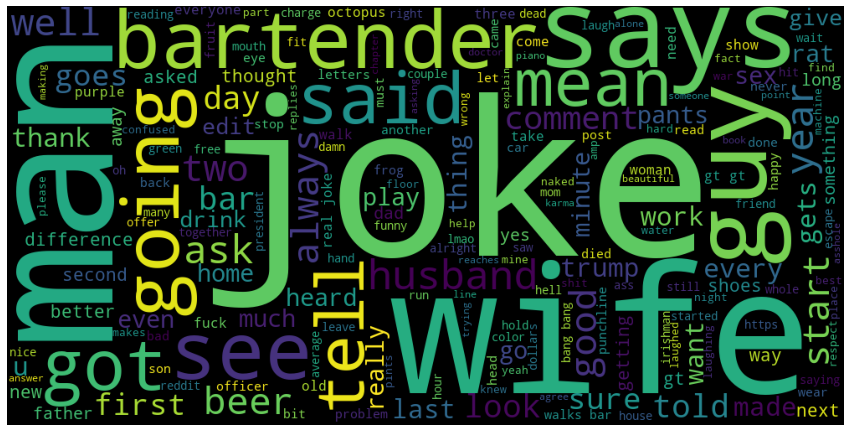

In [141]:
wordcloud1=WordCloud(width=1000,height=500).generate(' '.join(map(str, pd_jk_comment['body'])))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis('off')

In [157]:
# spacy

In [159]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "the person wear red T-shirt",
    "this person is walking",
    "the boy wear red T-shirt"
    ])

print(embeddings)

ModuleNotFoundError: No module named 'tensorflow_hub'